In [31]:
# import des packages

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick 
import matplotlib.pyplot as plt
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
warnings.filterwarnings("ignore")

In [32]:
# lecture du fichier csv

df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv",sep=",")

In [33]:
#on visualise le format du dataframe

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [34]:
# quelques infos

print("il y a" + " " + str(df.columns.value_counts().sum()) + " colonnes :")

df.columns.values

il y a 21 colonnes :


array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [37]:
# on peut explorer nos données pour les comprendres

print(" le taux de valeurs manquantes par variables:")
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

 le taux de valeurs manquantes par variables:


customerID          0.0
MonthlyCharges      0.0
PaymentMethod       0.0
PaperlessBilling    0.0
Contract            0.0
StreamingMovies     0.0
StreamingTV         0.0
TechSupport         0.0
DeviceProtection    0.0
TotalCharges        0.0
OnlineBackup        0.0
InternetService     0.0
MultipleLines       0.0
PhoneService        0.0
tenure              0.0
Dependents          0.0
Partner             0.0
SeniorCitizen       0.0
gender              0.0
OnlineSecurity      0.0
Churn               0.0
dtype: float64

<AxesSubplot:>

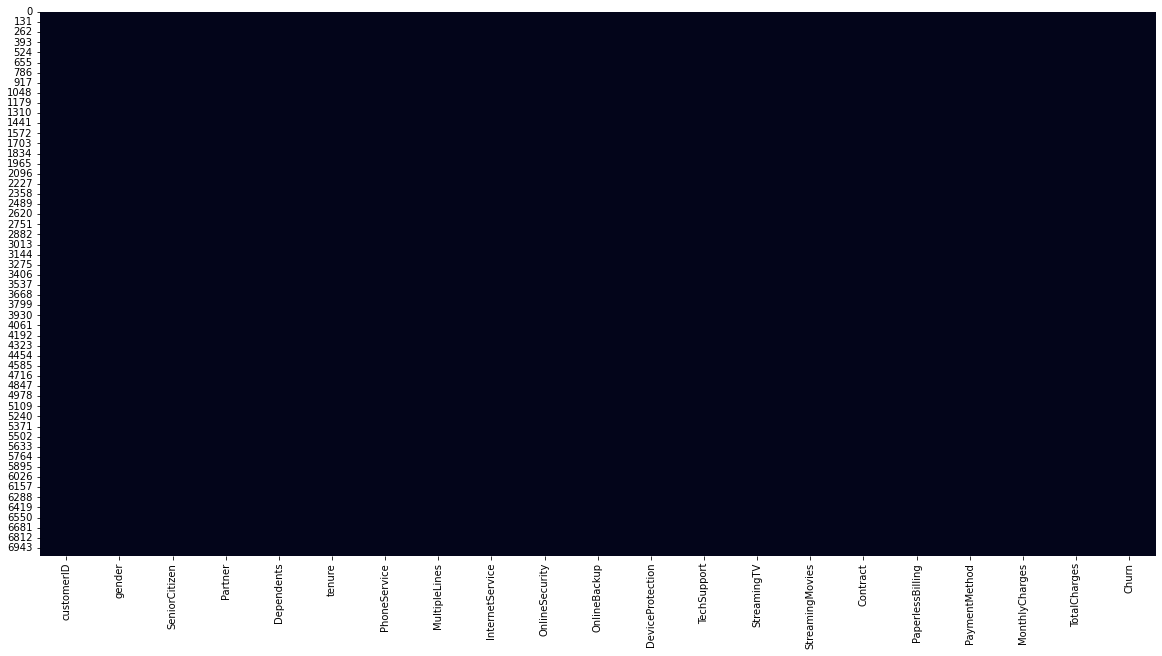

In [36]:
# graphiquement

plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [72]:
# on observe la variable cible

print("Le taux de churn est :")

df['Churn'].value_counts(normalize=True)

Le taux de churn est :


0    0.73463
1    0.26537
Name: Churn, dtype: float64

 2 seul variable continue -> MonthlyCharges qui represente le montant payée chaque mois par les clients et tenure 


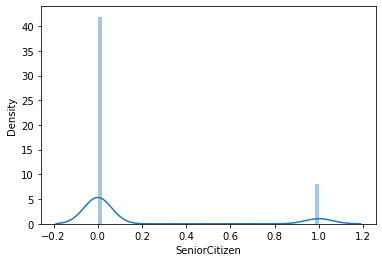

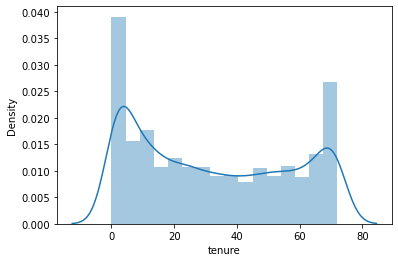

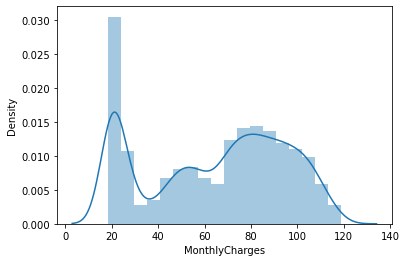

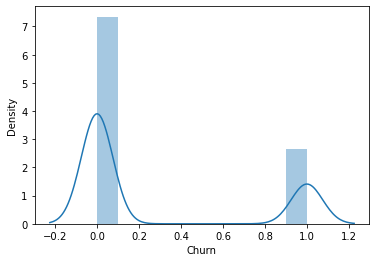

In [75]:
# on observe les varibles continue graphiquement

print(" 2 seul variable continue -> MonthlyCharges qui represente le montant payée chaque mois par les clients et tenure ")

for col in df.select_dtypes(['float','int'])  :
    plt.figure()
    sns.distplot(df[col])

In [76]:
# variable qualitative

#On observe quelles sont les valeurs uniques prise par chaque variable


for col in df.select_dtypes('object'):
    print(f'{col :-<40} {df[col].unique()}')

customerID------------------------------ ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender---------------------------------- ['Female' 'Male']
Partner--------------------------------- ['Yes' 'No']
Dependents------------------------------ ['No' 'Yes']
PhoneService---------------------------- ['No' 'Yes']
MultipleLines--------------------------- ['No phone service' 'No' 'Yes']
InternetService------------------------- ['DSL' 'Fiber optic' 'No']
OnlineSecurity-------------------------- ['No' 'Yes' 'No internet service']
OnlineBackup---------------------------- ['Yes' 'No' 'No internet service']
DeviceProtection------------------------ ['No' 'Yes' 'No internet service']
TechSupport----------------------------- ['No' 'Yes' 'No internet service']
StreamingTV----------------------------- ['No' 'Yes' 'No internet service']
StreamingMovies------------------------- ['No' 'Yes' 'No internet service']
Contract-------------------------------- ['Month-to-mont

In [ ]:
for col in df.select_dtypes('object'):
 plt.figure()
 df[col].value_counts().plot.pie()

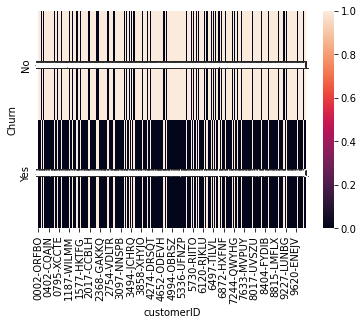

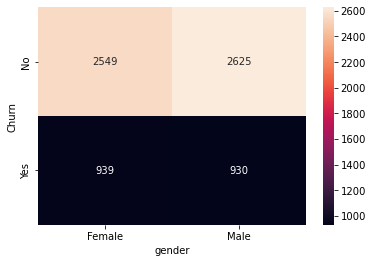

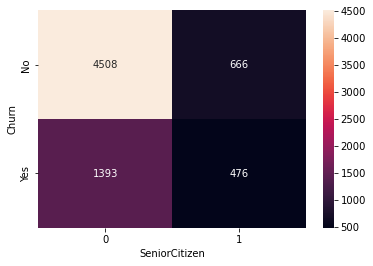

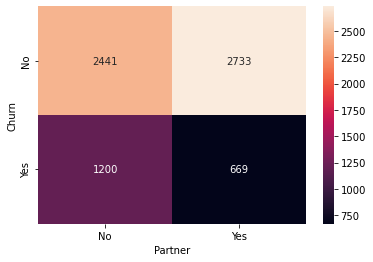

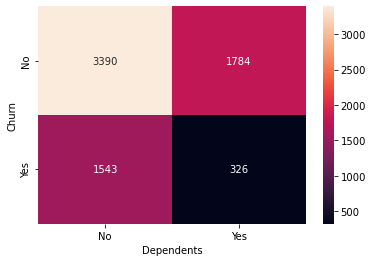

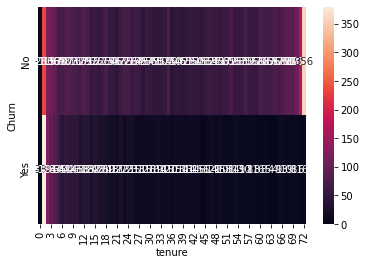

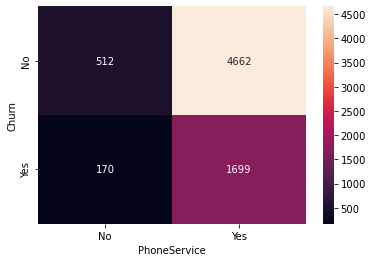

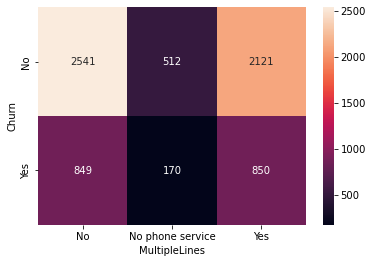

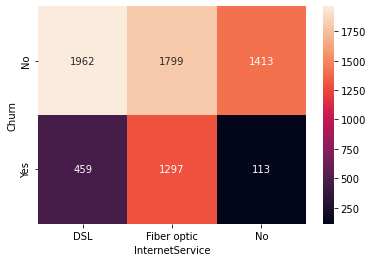

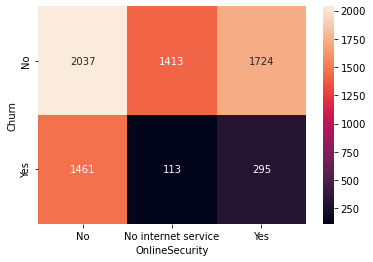

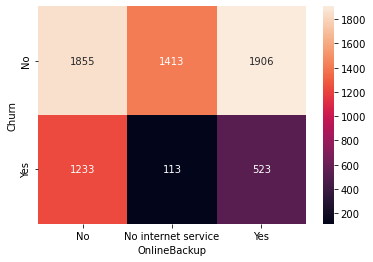

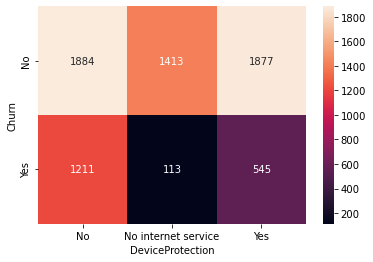

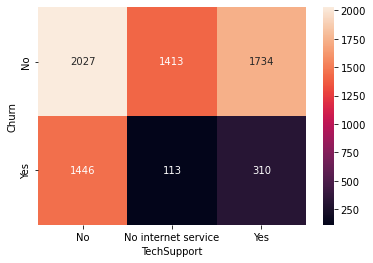

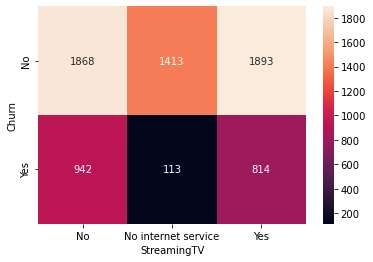

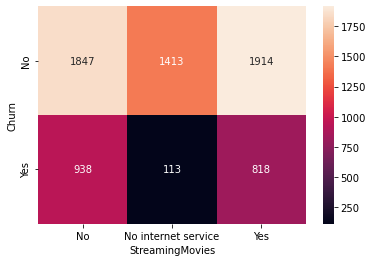

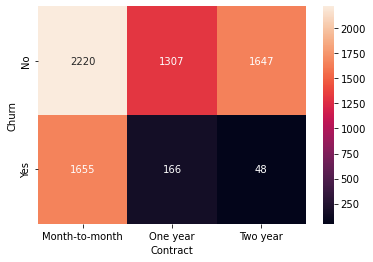

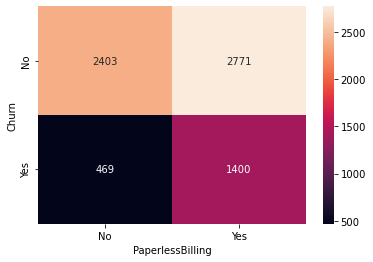

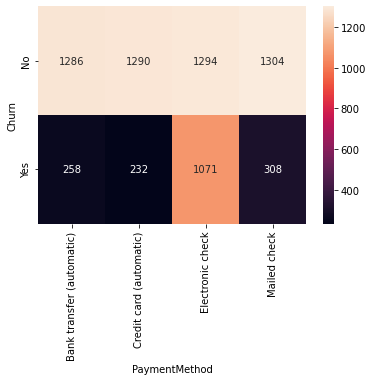

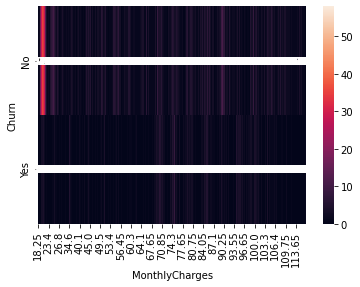

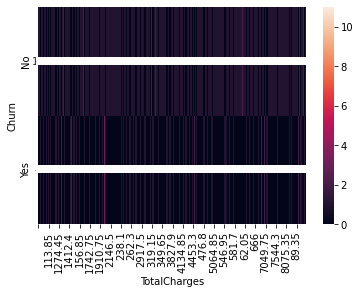

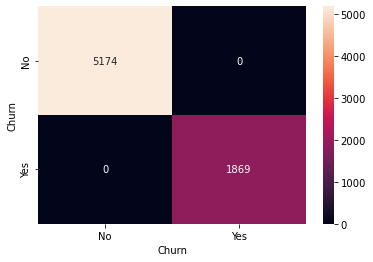

In [42]:
#observations graphique de la relation entre la variable target et les autres variables

for col in df.columns:
    plt.figure()
    sns.heatmap(pd.crosstab(df['Churn'], df[col]), annot=True, fmt='d')

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

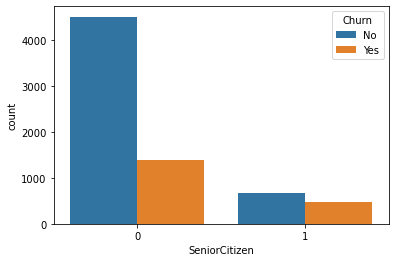

In [20]:
# relation personne agé et churn 

sns.countplot(x='SeniorCitizen', hue='Churn', data=df)

In [77]:
#preprocessing

#convertir la variable en numérique

df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

y = df['Churn']

X = df.drop(columns = ['Churn','customerID','TotalCharges'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [78]:
numerical_features = ['tenure','MonthlyCharges']
categorical_features = ['gender', 'SeniorCitizen', 'Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity'\
    , 'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

In [79]:
numerical_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
categorical_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())

In [80]:
preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                                   (categorical_pipeline, categorical_features))


In [81]:
X_train_bis=preprocessor.fit(X_train)
X_test_bis=preprocessor.fit(X_test)

In [83]:
#test avec adaboost

model = make_pipeline(preprocessor, AdaBoostClassifier())

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7915956842703009

In [84]:
# Procédure d'évaluation

from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [85]:
# fonction d'évaluation sur plusieurs modéles
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    

In [86]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor, SVC(random_state=0))
KNN = make_pipeline(preprocessor,KNeighborsClassifier())

In [87]:

dict_of_models = {'RandomForest': RandomForest,
                  'AdaBoost' : AdaBoost,
                  'SVM': SVM,
                  'KNN': KNN
                 }

RandomForest
[[1146  152]
 [ 260  203]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1298
           1       0.57      0.44      0.50       463

    accuracy                           0.77      1761
   macro avg       0.69      0.66      0.67      1761
weighted avg       0.75      0.77      0.76      1761

AdaBoost
[[1144  154]
 [ 213  250]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1298
           1       0.62      0.54      0.58       463

    accuracy                           0.79      1761
   macro avg       0.73      0.71      0.72      1761
weighted avg       0.78      0.79      0.79      1761

SVM
[[1173  125]
 [ 245  218]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1298
           1       0.64      0.47      0.54       463

    accuracy                           0.79      1761
   macro avg       0.

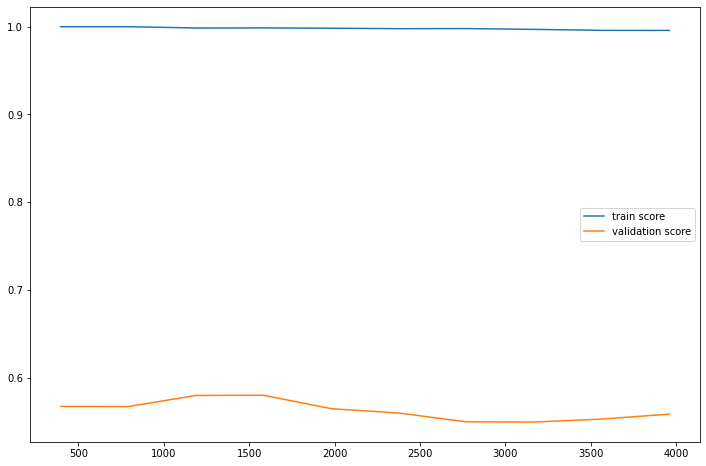

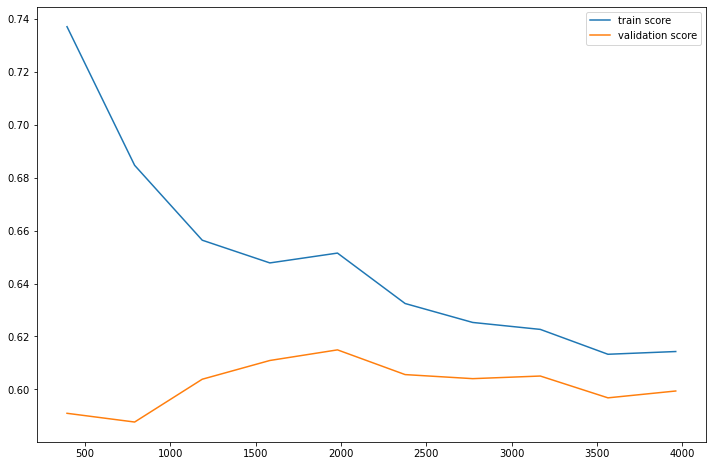

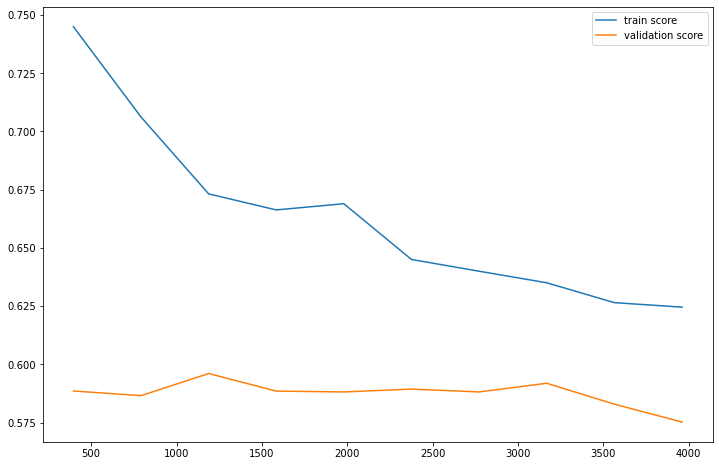

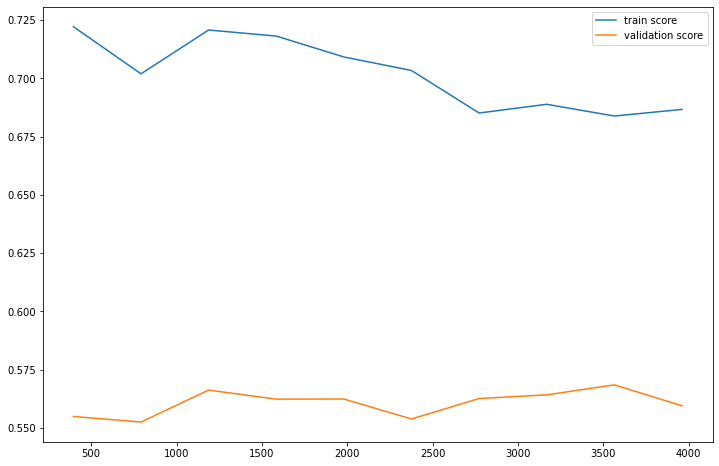

In [88]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

In [91]:
# on teste un xgboost

from sklearn.metrics import classification_report, confusion_matrix  
from sklearn import metrics
from xgboost import XGBClassifier

model = make_pipeline(preprocessor, XGBClassifier())
model.fit(X_train, y_train)
model.score(X_test, y_test)
preds = model.predict(X_test)
print(classification_report(y_test, preds))

[10:43:55] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1298
           1       0.60      0.51      0.55       463

    accuracy                           0.78      1761
   macro avg       0.72      0.69      0.70      1761
weighted avg       0.77      0.78      0.77      1761



In [93]:
#optimsation avec grid search

from sklearn.pipeline import Pipeline

numerical_pipeline = Pipeline([('imputer',SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),('onehot',OneHotEncoder(handle_unknown='ignore'))])

from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer([
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)])

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

pipe_lr = Pipeline([('preprocess',preprocessor),
 ('clf', LogisticRegression(random_state=42))])

pipe_rf = Pipeline([('preprocess',preprocessor),
('clf', RandomForestClassifier(random_state=42))])

pipe_svm = Pipeline([('preprocess',preprocessor),
('clf', svm.SVC(random_state=42))])



In [99]:
# Set grid search params
param_range = [9, 10]
param_range_fl = [1.0, 0.5]

grid_params_lr = [{'clf__penalty': ['l1', 'l2'],
        'clf__C': param_range_fl,
        'clf__solver': ['liblinear']}] 


grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
        'clf__max_depth': param_range,
        'clf__min_samples_split': param_range[1:]}]

grid_params_svm = [{'clf__kernel': ['linear', 'rbf'], 
        'clf__C': param_range}]

# Construct grid searches
jobs = -1

LR = GridSearchCV(estimator=pipe_lr,
            param_grid=grid_params_lr,
            scoring='accuracy',
            cv=10) 



RF = GridSearchCV(estimator=pipe_rf,
            param_grid=grid_params_rf,
            scoring='accuracy',
            cv=10, 
            n_jobs=jobs)


SVM = GridSearchCV(estimator=pipe_svm,
            param_grid=grid_params_svm,
            scoring='accuracy',
            cv=10,
            n_jobs=jobs)



# List of pipelines for iterating through each of them
grids = [LR,RF,SVM]

# Creating a dict for our reference
grid_dict = {0: 'Logistic Regression', 
        1: 'Random Forest',
        2: 'Support Vector Machine'}

# Fit the grid search objects
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])
    gs.fit(X_train, y_train)
    print('Best params are : %s' % gs.best_params_)
    # Best training data accuracy
    print('Best training accuracy: %.3f' % gs.best_score_)
    # Predict on test data with best params
    y_pred = gs.predict(X_test)
    # Test data accuracy of model with best params
    print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_test, y_pred))
    # Track best (highest test accuracy) model
    if accuracy_score(y_test, y_pred) > best_acc:
        best_acc = accuracy_score(y_test, y_pred)
        best_gs = gs
        best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])


Performing model optimizations...

Estimator: Logistic Regression
Best params are : {'clf__C': 1.0, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Best training accuracy: 0.803
Test set accuracy score for best params: 0.799 

Estimator: Random Forest
Best params are : {'clf__criterion': 'entropy', 'clf__max_depth': 9, 'clf__min_samples_split': 10}
Best training accuracy: 0.804
Test set accuracy score for best params: 0.788 

Estimator: Support Vector Machine
Best params are : {'clf__C': 10, 'clf__kernel': 'linear'}
Best training accuracy: 0.801
Test set accuracy score for best params: 0.799 

Classifier with best test set accuracy: Logistic Regression
